# Проект 4. Сборный проект

## Анализ видеоигр для интернет-магазина

Исходные данные - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Задача - выявить определяющие успешность игры закономерности. 

## Предобработка данных

### Импорт библиотек, импорт датасета

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import math
from math import factorial
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/games.csv')   #D:/study_materials/PYTHON
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


всего 16715 строк

### Начало предобработки данных

In [4]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
df['rating'] = df['rating'].str.lower()
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['year'] = df['year_of_release'].dt.year
df['year'] = df['year'].astype('Int64')

df['critic_score'] = df['critic_score'].astype('Int64')
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'])
#df.loc[df['user_score'] == 'tbd', 'user_score'] = 'NaN'


In [5]:
df['name'].isna().sum()

2

In [6]:
df['year_of_release'].isna().sum()

269

In [7]:
df['year_of_release'].isna().sum() / len(df)

0.01609332934489979

In [8]:
df['genre'].isna().sum()

2

In [9]:
df.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int64
user_score         7463 non-null float64
rating             9768 non-null object
year               16444 non-null Int64
dtypes: Int64(2), datetime64[ns](1), float64(5), object(4)
memory usage: 1.7+ MB


In [10]:
df['critic_score'].isna().sum()

8461

In [11]:
df['user_score'].isna().sum()

8981

In [12]:
df['rating'].isna().sum()

6676

In [13]:
#df.dropna(subset=['critic_score', 'user_score', 'rating'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int64
user_score         7463 non-null float64
rating             9768 non-null object
year               16444 non-null Int64
dtypes: Int64(2), datetime64[ns](1), float64(5), object(4)
memory usage: 1.7+ MB


In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76,8.0,e,2006
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82,8.3,e,2008
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80,8.0,e,2009
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996


**В результате принято решение об удалении значительной части данных в таблице. Анализировать показатели рейтинга без имеющихся значений показалось мне спорной идеей**

In [15]:
df['rating'].value_counts()

e       3921
t       2905
m       1536
e10+    1393
ec         8
k-a        3
rp         1
ao         1
Name: rating, dtype: int64

In [16]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76,8.0,e,2006,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82,8.3,e,2008,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80,8.0,e,2009,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996,31.38


**Создан столбец с суммарными продажами**

## Исследовательский анализ данных

In [17]:
df.pivot_table(index='year', values = 'name', aggfunc='count')

,name
year,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


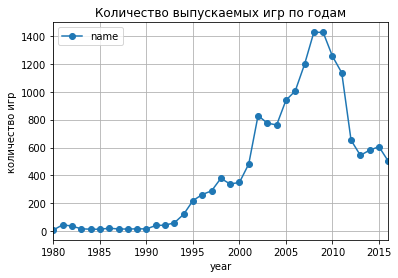

In [18]:
df.pivot_table(index='year', values = 'name', aggfunc='count').reset_index().plot(x='year', y='name', style='o-', grid=True, title='Количество выпускаемых игр по годам') #, xlabel='Год', ylabel='количество игр')
plt.ylabel('количество игр')
plt.show()

### Выводы
Количество выпускаемых игр изменяется неравномерно с годами. До 2000 года игр выпускается крайне мало - до первой сотни. Я связываю это с тем, что в тот период индустрия геймдэва только зарождалась и набирала обороты, а компьютеров тогда еще у всех поголовно не было, хоть тогда уже и было определенное немалое количество компьютерных (и не только) игр. 

С 2000 по 2008 год можно сказать что имелся определенный восходящий тренд, т.е. число выпускаемых игр в среднем росло, особенно активно до 2005. После 2008-2010 годов идет снижение темпа выпуска новых игр. Я связываю это с тем, что игры стали более сложными в плане физики, математики, графики и прочего. Т.е. от количества рынок перешел к качеству и глубине проработки. 

Далее проанализируем цикл жизни игровых платформ, поскольку сейчас мы отобразили выпуск игр без группировки по платформам.

In [19]:
df.pivot_table(index=['platform'], values='total_sales').sort_values(by = 'total_sales', ascending=False).head(30)#.reset_index().head(30)

,total_sales
platform,
gb,2.622990
nes,2.561735
gen,1.050000
snes,0.836987
ps4,0.801378
x360,0.780227
2600,0.745517
ps3,0.713124
wii,0.692986


In [20]:
df_platform1 = df.pivot_table(index=['year'], columns = 'platform', values='total_sales') #.sort_values(by = 'sum_sales', ascending=False).reset_index()
df_platform1.reset_index()

platform,year,2600,3do,3ds,dc,ds,gb,gba,gc,gen,gg,n64,nes,ng,pc,pcfx,ps,ps2,ps3,ps4,psp,psv,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
0,1980,1.264444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,0.775652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,0.802222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,0.530909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.826667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,0.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.852308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,0.450000,NaN,NaN,NaN,0.020000,NaN,NaN,NaN,NaN,NaN,NaN,4.858182,NaN,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1986,0.335000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.916316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1987,0.323333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.976000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,0.370000,NaN,NaN,NaN,NaN,1.430000,NaN,NaN,NaN,NaN,NaN,4.091818,NaN,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1989,0.315000,NaN,NaN,NaN,NaN,6.497000,NaN,NaN,NaN,NaN,NaN,1.570000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


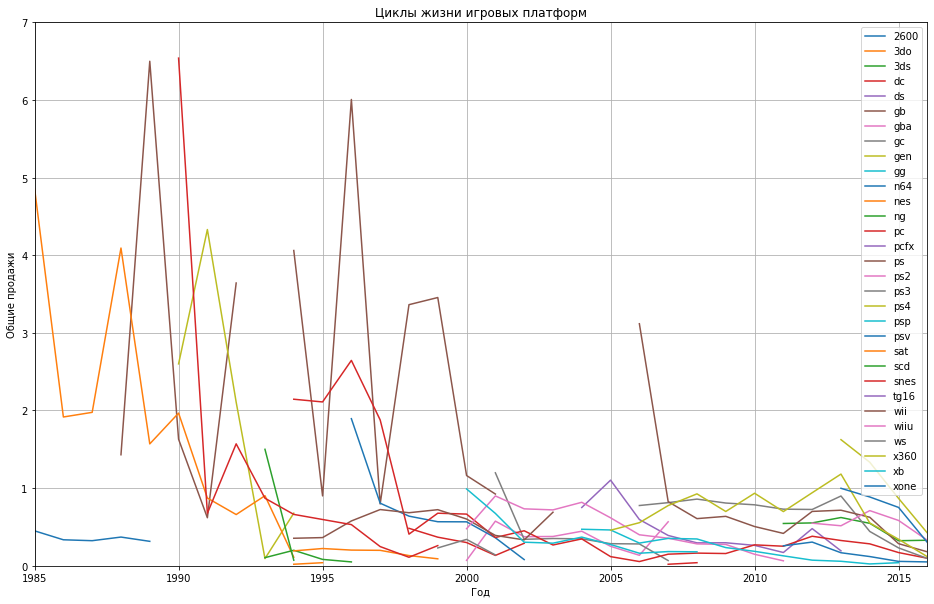

In [21]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.axis([1985,2016,0,7])
plt.plot(df_platform1)
plt.title('Циклы жизни игровых платформ')
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.legend(df_platform1, loc=1)
plt.show()

**выводы по графику**

Срок жизни платформ составляет порядка 7-11 лет

3ds, pc, ps4, psv, wiiu, xone, а остальные уже изжили себя.. актуальный период - 2010 - 2016 год (вместе с названными платформами)

In [22]:
new_df = df.query('year >= 2010 and platform in ("3ds", "pc", "ps4", "psv", "wiiu", "xone")')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 31 to 16714
Data columns (total 13 columns):
name               2206 non-null object
platform           2206 non-null object
year_of_release    2206 non-null datetime64[ns]
genre              2206 non-null object
na_sales           2206 non-null float64
eu_sales           2206 non-null float64
jp_sales           2206 non-null float64
other_sales        2206 non-null float64
critic_score       1146 non-null Int64
user_score         1226 non-null float64
rating             1276 non-null object
year               2206 non-null Int64
total_sales        2206 non-null float64
dtypes: Int64(2), datetime64[ns](1), float64(6), object(4)
memory usage: 245.6+ KB


In [23]:
new_df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
31,call of duty: black ops 3,ps4,2015-01-01,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,2015,14.63
33,pokemon x/pokemon y,3ds,2013-01-01,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,2013,14.60
40,mario kart 7,3ds,2011-01-01,racing,5.03,4.02,2.69,0.91,85,8.2,e,2011,12.65
42,grand theft auto v,ps4,2014-01-01,action,3.96,6.31,0.38,1.97,97,8.3,m,2014,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014-01-01,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,2014,11.68


In [24]:
platform_sales = new_df.pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')
platform_sales

platform,3ds,pc,ps4,psv,wiiu,xone
year,,,,,,
2010,NaN,24.28,NaN,NaN,NaN,NaN
2011,63.20,35.03,NaN,4.63,NaN,NaN
2012,51.36,23.22,NaN,16.19,17.56,NaN
2013,56.57,12.38,25.99,10.59,21.65,18.96
2014,43.76,13.28,100.00,11.90,22.03,54.07
2015,27.78,8.52,118.90,6.25,16.35,60.14
2016,15.14,5.25,69.25,4.25,4.60,26.15


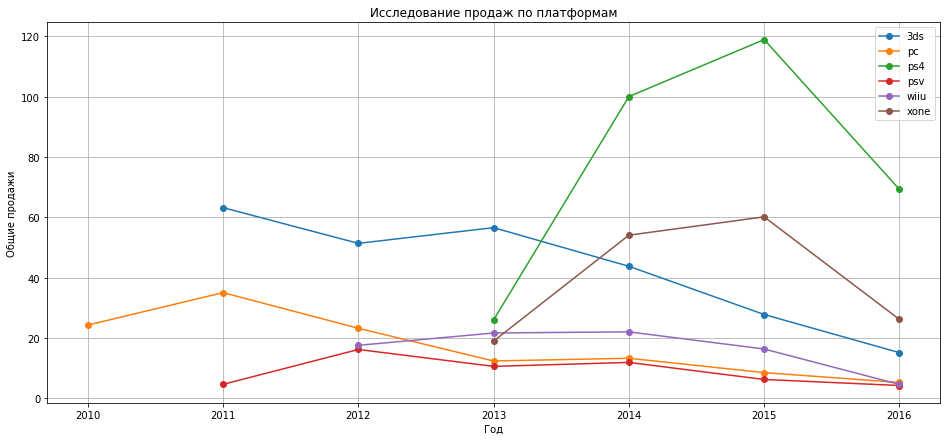

In [25]:
plt.figure(figsize=(16,7))
plt.grid(True)
plt.plot(platform_sales, 'o-')
plt.title('Исследование продаж по платформам')
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.legend(platform_sales, loc=1)
plt.show()

**Выводы**

По приведенному выше графику видно, что относительно отобранных платформ по общим продажам лидирует платформа PS4, за ней следует XboxOne. На третьем месте по состоянию на 2016 год 3DS. 

В целом за 2016 год **продажи упали у всех платформ**. У лидеров - плейстейшн и иксбокс - падение продаж наиболее сильные, а у 3DS равномерное снижение с 2013 года. Наиболее выгодные платформы - PS4, XboxOne, 3DS.

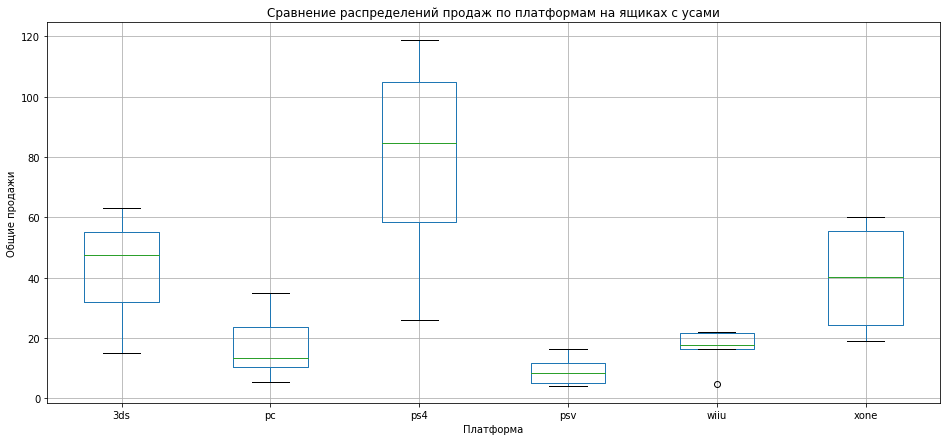

In [26]:
plt.figure(figsize=(16,7))
platform_sales.boxplot()
plt.title('Сравнение распределений продаж по платформам на ящиках с усами')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
plt.show()

**Выводы по боксплотам**

1) Построены диаграммы размаха по глобальным продажам для отобранных приставок. 

2) По ним видно, что самые большие продажи по медиане на PS4, затем у XOne, самые низкие медианные продажи у PSVita. 

3) Заметно смещение распределения у PS4 к третьему квартилю, как и у wiiu, а у 3ds, PC медиана наоборот смещена к первому квартилю. А PSV и XOne имеют примерно симметричное распределение. 

4) Также заметны выбросы для wiiu. 

5) Наибольший разброс значений продаж отмечается у PS4.

**Анализ связи продаж и отзывов**

Для анализа связи продаж и отзывов пользователей, критиков рассмотрим PS4, как самую прибыльную платформу.

In [27]:
ps4 = new_df.query('platform == "ps4"')
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
31,call of duty: black ops 3,ps4,2015-01-01,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,2015,14.63
42,grand theft auto v,ps4,2014-01-01,action,3.96,6.31,0.38,1.97,97,8.3,m,2014,12.62
77,fifa 16,ps4,2015-01-01,sports,1.12,6.12,0.06,1.28,82,4.3,e,2015,8.58
87,star wars battlefront (2015),ps4,2015-01-01,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,2015,7.98
92,call of duty: advanced warfare,ps4,2014-01-01,shooter,2.81,3.48,0.14,1.23,83,5.7,m,2014,7.66


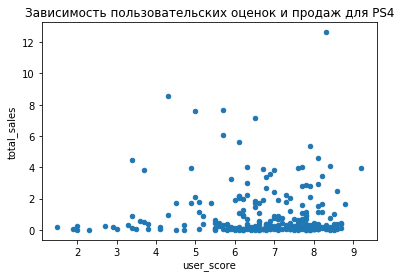

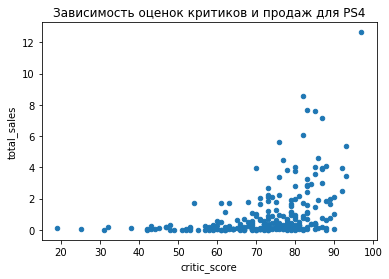

In [28]:
ps4.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость пользовательских оценок и продаж для PS4')
plt.show()

ps4.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость оценок критиков и продаж для PS4')
plt.show()

По диаграмме рассеяния сложно сказать о наличии какой-то сильной связи. Я бы сказал что связи с покупателями практически нет, а относительно оценки критиков есть определенный (похоже на логарифмический) восходящий тренд, когда игры с бОльшим рейтингом имеют бОльшие продажи. 

Посмотрим коэффициент корреляции между величинами:

In [29]:
ps4['critic_score'] = ps4['critic_score'].astype('float64')
ps4['user_score'] = ps4['user_score'].astype('float64')

print(ps4['critic_score'].corr(ps4['total_sales']))
print(ps4['user_score'].corr(ps4['total_sales']))

0.40656790206178095
-0.031957110204556424


**Вывод**

Коэффициент корреляции Пирсена подтверждает мои выводы - связи между оценкой покупателей и продажами нет, а вот между оценкой критиков и продажами игр есть слабая прямая связь.

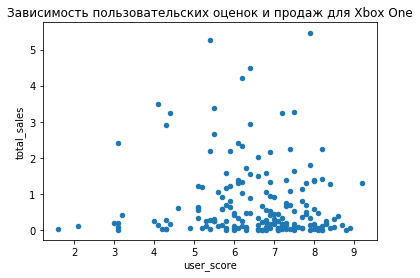

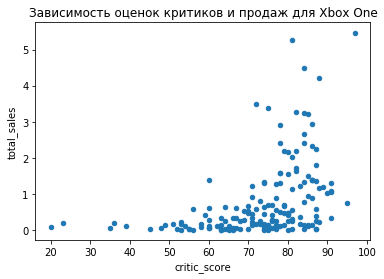

0.4169983280084017
-0.06892505328279414


In [30]:
xone = new_df.query('platform == "xone"')
xone.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость пользовательских оценок и продаж для Xbox One')
plt.show()

xone.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость оценок критиков и продаж для Xbox One')
plt.show()

xone['critic_score'] = xone['critic_score'].astype('float64')
xone['user_score'] = xone['user_score'].astype('float64')

print(xone['critic_score'].corr(xone['total_sales']))
print(xone['user_score'].corr(xone['total_sales']))

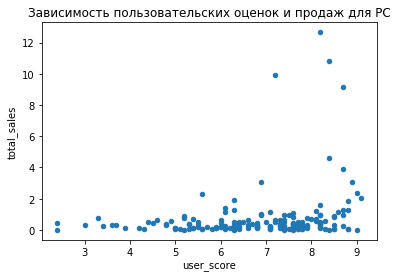

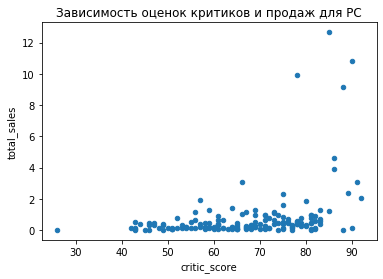

0.3487397305984834
0.22207843643390882


In [31]:
ds = new_df.query('platform == "3ds"')
ds.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость пользовательских оценок и продаж для PC')
plt.show()

ds.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость оценок критиков и продаж для PC')
plt.show()

ds['critic_score'] = ds['critic_score'].astype('float64')
ds['user_score'] = ds['user_score'].astype('float64')

print(ds['critic_score'].corr(ds['total_sales']))
print(ds['user_score'].corr(ds['total_sales']))

**Вывод**

Аналогичный анализ для еще двух популярных платформ - XboxOne и 3DS показал, что связь между исследуемыми параметрами такая же - отсутствие связи между продажами и оценкой покупателей и слабая с оценкой критиков только у Xbox One. В качестве исключения у 3DS появился намек на слабую связь от оценок пользователей, но предполагаю, что это не систематически, а просто особенность платформы. 

Думаю что в целом с другими платформами ситуация должна быть аналогична.

### Общее распределение по жанрам

In [32]:
genre_sales = new_df.pivot_table(index='year', columns='genre', values='total_sales', aggfunc='sum')
genre_sales

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
year,,,,,,,,,,,,
2010,2.10,0.24,0.01,0.14,NaN,0.11,0.54,5.82,2.04,3.49,1.55,8.24
2011,19.44,1.49,2.51,1.69,13.90,3.54,15.82,14.03,11.28,9.94,5.25,3.97
2012,28.26,1.67,1.47,7.92,17.44,0.96,3.16,23.49,5.93,11.51,5.54,0.98
2013,31.64,3.04,2.02,8.23,17.08,0.96,5.48,31.89,20.60,7.48,12.71,5.01
2014,75.40,3.79,13.27,14.67,8.16,1.45,14.13,37.46,44.24,5.51,26.04,0.92
2015,63.52,6.04,7.08,9.60,5.96,0.71,7.96,36.87,62.71,4.93,30.71,1.85
2016,28.62,3.61,4.32,2.16,3.02,0.01,2.79,17.72,38.16,1.89,21.21,1.13


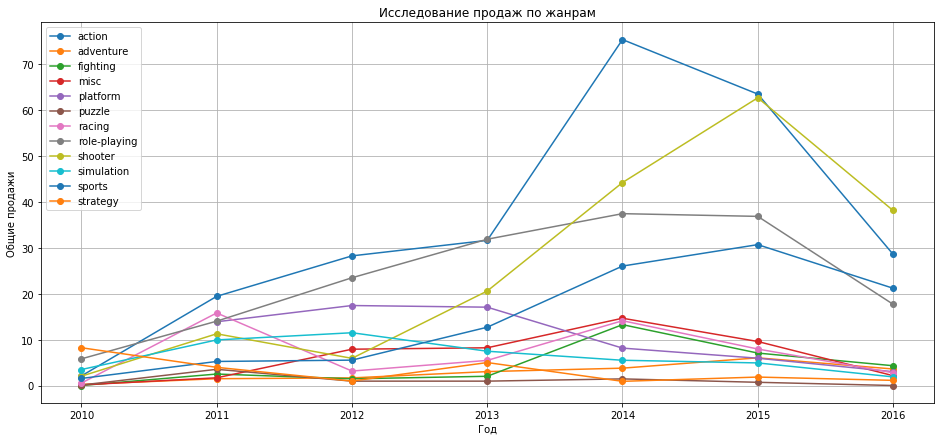

In [33]:
plt.figure(figsize=(16,7))
plt.grid(True)
plt.plot(genre_sales, 'o-')
plt.title('Исследование продаж по жанрам')
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.legend(genre_sales, loc=2)
plt.show()

**Выводы**

На фоне общего распределения выделяются наиболее продаваемые жанры - Экшены, шутеры, спортивные игры. Они долгое время являются лидерами по продажам и соответственно самыми популярными. Однако следует отметить, что продажи экшен и спортивных игр снизились в 2014-2016 годах, а вот шутеры в 2014 и 2015 годах росли.

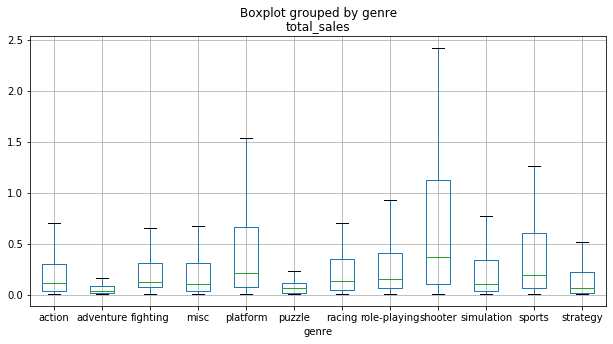

In [34]:
new_df.boxplot('total_sales', by='genre', showfliers = False, figsize=(10, 5))

## Портрет пользователей каждого региона

### Северная Америка

In [35]:
new_df_all_platforms = df.query('year >= 2010')

In [36]:
na_platform = new_df_all_platforms.groupby(['platform']).agg({'na_sales':'sum'})
na_platform['part'] = na_platform['na_sales'] / na_platform['na_sales'].sum()
na_platform.sort_values(by='part', ascending=False).head()

,na_sales,part
platform,,
x360,334.18,0.295627
ps3,229.25,0.202803
wii,121.20,0.107218
ps4,108.74,0.096195
xone,93.12,0.082377


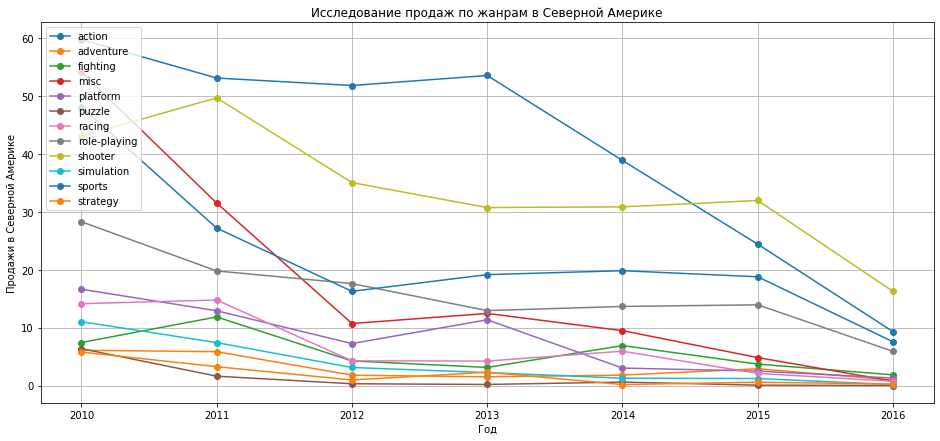

In [37]:
na_sales = new_df_all_platforms.pivot_table(index='year', columns='genre', values='na_sales', aggfunc='sum')
na_sales
plt.figure(figsize=(16,7))
plt.grid(True)
plt.plot(na_sales, 'o-')
plt.title('Исследование продаж по жанрам в Северной Америке')
plt.xlabel('Год')
plt.ylabel('Продажи в Северной Америке')
plt.legend(na_sales, loc=2)
plt.show()

In [38]:
na_rating_sales = new_df_all_platforms.groupby(['rating']).agg({'na_sales':'sum'})
na_rating_sales

,na_sales
rating,
e,271.15
e10+,159.38
ec,1.13
m,382.22
rp,0.00
t,160.81


e - everyone

e10+ - 10 years and older

m - mature

rp - ozhidaetsya

t - teen

**Выводы**

Жанры в северной америке совпадают с общими самыми популярными жанрами по продажам - экшн, шутеры и спорт. Однако в 2015 году шутеры обогнали другие жанры по продажам, причем достаточно сильно.

По долям продаж наибольшую часть составляет **платформа Xbox360 - 30%, затем идут PS3 - 20%, wii - 10%.**

Топ-5 платформ: **Xbox 360, PS3, wii PS4, Xone**

Топ-5 жанров: **шутеры, экшн, спортивные, ролевые, файтинги**

По рейтингу ESBR **самые продаваемые игры для взрослых (m), самые непопулярные - игры ec, дети раннего возраста**, и ноль продаж у игр без оценки. Возможно такие игры не допускаются в продажу.. 

### Европа

In [39]:
eu_platform = new_df_all_platforms.groupby(['platform']).agg({'eu_sales':'sum'})
eu_platform['part'] = eu_platform['eu_sales'] / eu_platform['eu_sales'].sum()
eu_platform.sort_values(by='part', ascending=False).head()

,eu_sales,part
platform,,
ps3,213.60,0.253920
x360,163.41,0.194256
ps4,141.09,0.167723
pc,68.82,0.081811
wii,65.91,0.078351


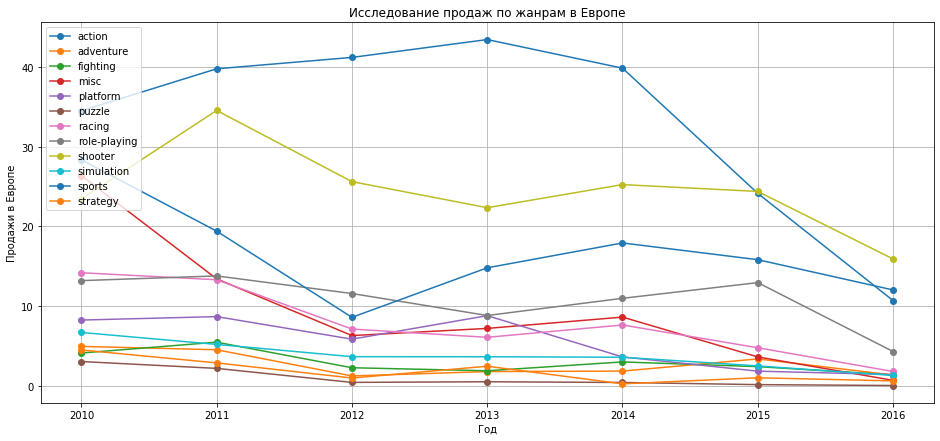

In [40]:
eu_sales = new_df_all_platforms.pivot_table(index='year', columns='genre', values='eu_sales', aggfunc='sum')
eu_sales
plt.figure(figsize=(16,7))
plt.grid(True)
plt.plot(eu_sales, 'o-')
plt.title('Исследование продаж по жанрам в Европе')
plt.xlabel('Год')
plt.ylabel('Продажи в Европе')
plt.legend(eu_sales, loc=2)
plt.show()

In [41]:
eu_rating_sales = new_df_all_platforms.groupby(['rating']).agg({'eu_sales':'sum'})
eu_rating_sales

,eu_sales
rating,
e,197.34
e10+,99.28
ec,0.00
m,292.04
rp,0.03
t,113.08


e - everyone

e10+ - 10 years and older

m - mature

rp - ozhidaetsya

t - teen

**Выводы**

В европе история с шутером аналогична - в 2015 они обогнали другие жанры, а 2 и третье место делят экшн и спорт.

По долям продаж наибольшую часть составляет **платформа PS3 - 25%, затем идут Xbox360 - 20%, PS4 - 17%.**

Топ-5 платформ: **PS3, Xbox360, PS4, PC, wii**

Топ-5 жанров: **шутеры, спортивные, экшн, ролевые игры, гонки**

По рейтингу ESBR **самые популярные игры с рейтингом m - для взрослых, наименее популярные - также для 10+**, тут игры без оценки имеют минимальные продажи. Может быть это демо версии? 

### Япония

In [42]:
jp_platform = new_df_all_platforms.groupby(['platform']).agg({'jp_sales':'sum'})
jp_platform['part'] = jp_platform['jp_sales'] / jp_platform['jp_sales'].sum()##
jp_platform.sort_values(by='part', ascending=False).head()

,jp_sales,part
platform,,
3ds,100.62,0.329750
ps3,59.26,0.194206
psp,42.20,0.138297
ds,27.90,0.091433
psv,21.84,0.071574


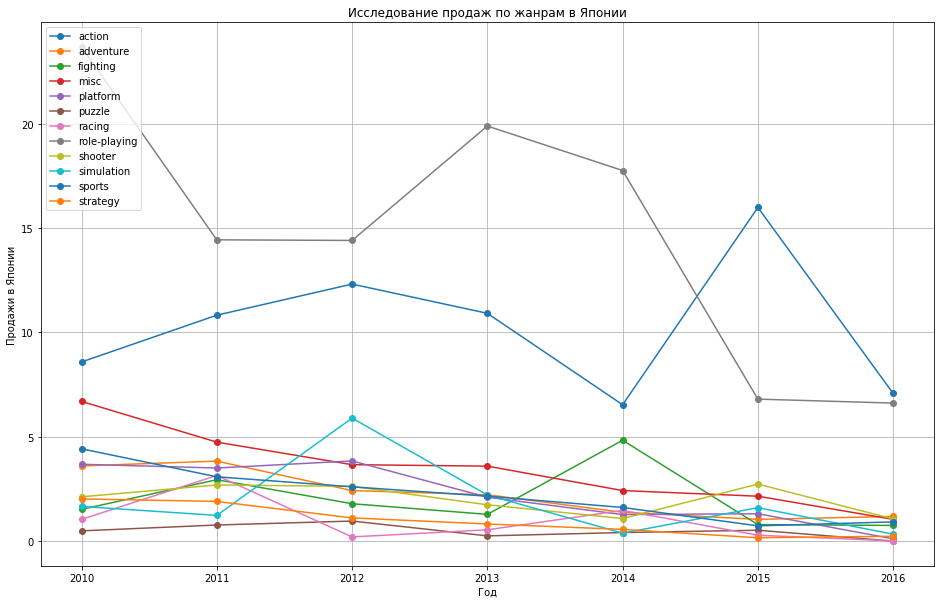

In [43]:
jp_sales = new_df_all_platforms.pivot_table(index='year', columns='genre', values='jp_sales', aggfunc='sum')
jp_sales
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(jp_sales, 'o-')
plt.title('Исследование продаж по жанрам в Японии')
plt.xlabel('Год')
plt.ylabel('Продажи в Японии')
plt.legend(jp_sales, loc=2)
plt.show()

In [44]:
jp_rating_sales = new_df_all_platforms.groupby(['rating']).agg({'jp_sales':'sum'})
jp_rating_sales

,jp_sales
rating,
e,47.87
e10+,13.22
ec,0.00
m,30.45
rp,0.00
t,42.11


**Выводы**

В Японии по долям продаж наибольшую часть составляет **платформа 3ds - 33%, затем идут PS3 - 19%, PSP - 14%.**
Примечательно, что продажи игр на ПК равны нулю - **в Японии не играют в компьютеры**

Топ-5 платформ: **3ds, PS3, PSP, DS, PSVita**

Топ-5 жанров: **Экшен, ролевые, стратегии, шутеры, спорт/файтинги**

По рейтингу ESBR **самые популярные игры - для всех (е), наименее популярные для 10+.**

## Проверка гипотез

Проверять гипотезы будем с помощью t-теста, так как предполагаем, что в пределах генеральной совокупности данные распределены нормально.

### Проверка гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

**Н0 - средний рейтинг Xbox One равен PC**

**Н1 - рейтинги не равны**

In [45]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
31,call of duty: black ops 3,ps4,2015-01-01,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,2015,14.63
33,pokemon x/pokemon y,3ds,2013-01-01,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,2013,14.60
40,mario kart 7,3ds,2011-01-01,racing,5.03,4.02,2.69,0.91,85,8.2,e,2011,12.65
42,grand theft auto v,ps4,2014-01-01,action,3.96,6.31,0.38,1.97,97,8.3,m,2014,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014-01-01,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,2014,11.68


In [46]:
new_df.dropna(subset=['critic_score', 'user_score', 'rating'], inplace=True)
sample_1 = new_df[new_df['platform'] == 'xone']['user_score']
sample_2 = new_df[new_df['platform'] == 'pc']['user_score']
print('Sample_1_var =', np.var(sample_1, ddof=1))
print('Sample_2_var =', np.var(sample_2, ddof=1))
if np.var(sample_1, ddof=1) == np.var(sample_2, ddof=1):
    print('Можно использовать значение equal_var=True, они равны')
else:
    print('Можно использовать значние equal_var=False, они не равны')

Sample_1_var = 1.7914075312475122
Sample_2_var = 2.4634289022880647
Можно использовать значние equal_var=False, они не равны


In [47]:
alpha = .05
results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9780012867659709
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть Но, значит пользовательские рейтинги могут быть одинаковы

### Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные"

**Н0 - средний рейтинг Action равен Sports**

**Н1 - рейтинги не равны**

In [48]:
sample_3 = new_df[new_df['genre'] == 'action']['user_score']
sample_4 = new_df[new_df['genre'] == 'sports']['user_score']
                  
print('Sample_1_var =', np.var(sample_3, ddof=1))
print('Sample_2_var =', np.var(sample_4, ddof=1))
if np.var(sample_3, ddof=1) == np.var(sample_4, ddof=1):
    print('Можно использовать значение equal_var=True, они равны')
else:
    print('Можно использовать значние equal_var=False, они не равны')

Sample_1_var = 1.7677940313955496
Sample_2_var = 2.291227106227106
Можно использовать значние equal_var=False, они не равны


In [49]:
alpha = .05
results = st.ttest_ind(
    sample_3, 
    sample_4, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4807100450387355e-07
Отвергаем нулевую гипотезу


Но отвергнута, то есть рейтинги жанров спорт и экшен не равны, причем мы не может утверждать какое больше а какое меньше.

# Общие выводы:

Был проделан сборный проект по анализу рынка компьютерных игр.
- [x] Была изучена общая информация о данных;
- [x] была проведена предобработка данных;
данные приведены к нужным типам, отсеяны некоторые данные, которые помешали бы в дальнейшем анализе
- [x] Проведен исследовательский анализ данных; 
в результате которого установлен характерный срок жизни платформ (7-11 лет), актуальный период (2010-2016 гг), определены лидеры роста и падения продаж среди платформ, определены потенциально прибыльные платформы (PS4, Xbox One, PC), проанализированы диаграммы размаха по продажам с разных платформ, определены самые прибыльные жанры.
- [x] составлен портрет пользователя по регионам; 
получен список 5 популярных платформ, 5 жанров, оценено влияние рейтинга ESBR на продажу игр
- [x] Проверены гипотезы о равенстве пользовательских рейтингов платформ Xbox и PC (невозможно отвергнуть гипотезу) и Action и Sports (нулевая гипотеза отвергнута);
- [x] проект оформлен в читаемый внешний вид;
- [x] получен колоссальный для новичка опыт в составлении и выполнении проектов такого рода)); 

***Спасибо за внимание!!!***

#### Использованные источники

https://pythonru.com/biblioteki/tipy-grafikov-v-matplotlib-plt3 matplotlib

https://devpractice.ru/matplotlib-lesson-4-1-viz-linear-chart/